## Test read of NOAA EBAS Nephelometer data file from Betsy

In [1]:
import pyaerocom as pya

Init data paths for lustre


0.00712132453918457 s


### Specify files to read 

The first one is the one from Betsy and the second one is one I picked from our database from the same station.

In [2]:
file_from_betsy = 'US0035R.20100101000000.20190131170718.aerosol_light_scattering_coefficient.pm10.1y.1h.lev2.nas'

file_from_ebas = 'US0035R.20150826223157.20160117041718.nephelometer..pm10.33d.1h.US06L_TSI_3563_BND_pm10.US06L_scat_coef.lev2.nas'

### Read and plot NASA Ames file from Betsy (using pyaerocom low-level reading)

In [3]:
data = pya.io.EbasNasaAmesFile(file_from_betsy)

Betsy, does everything below look right?

In [4]:
print(data)

Pyaerocom EbasNasaAmesFile
--------------------------

   num_head_lines: 91
   num_head_fmt: 1001
   data_originator: Sheridan, Patrick
   sponsor_organisation: US06L, National Oceanic and Atmospheric Administration/Earth System Research Laboratory/Global Monitoring Division, NOAA/ESRL/GMD, , 325 Broadway, , 80305, "Boulder, CO", USA
   submitter: Sheridan, Patrick
   project_association: GAW-WDCA NOAA-ESRL
   vol_num: 1
   vol_totnum: 1
   ref_date: 2010-01-01T00:00:00
   revision_date: 2019-01-31T00:00:00
   freq: 0.041667
   descr_time_unit: Days from the file reference point (start_time)
   num_cols_dependent: 25
   mul_factors (list, 25 items)
   [1.0
    1.0
    ...
    1.0
    1.0]

   vals_invalid (list, 25 items)
   [9999.999999
    9999.0
    ...
    9999.99
    9.999999999999998]

   descr_first_col: end_time of measurement, days from the file reference point

   Column variable definitions
   -------------------------------
   EbasColDef: name=start_time, unit=Days, is_var

In [13]:
df_scat = data.to_dataframe(var_name='aerosol_light_scattering_coefficient')
df_scat.head()

,aerosol_light_scattering_coefficient_1/Mm_450.0nm,aerosol_light_scattering_coefficient_1/Mm_550.0nm,aerosol_light_scattering_coefficient_1/Mm_700.0nm,aerosol_light_scattering_coefficient_1/Mm_450.0nm_percentile:15.87,aerosol_light_scattering_coefficient_1/Mm_550.0nm_percentile:15.87,aerosol_light_scattering_coefficient_1/Mm_700.0nm_percentile:15.87,aerosol_light_scattering_coefficient_1/Mm_450.0nm_percentile:84.13,aerosol_light_scattering_coefficient_1/Mm_550.0nm_percentile:84.13,aerosol_light_scattering_coefficient_1/Mm_700.0nm_percentile:84.13
2010-01-01 00:30:00,74.04,53.33,35.06,73.05,52.80,34.66,76.09,54.17,35.57
2010-01-01 01:29:59,61.89,45.13,29.97,58.11,42.17,27.85,66.66,48.81,31.82
2010-01-01 02:29:59,50.32,36.48,24.55,48.09,35.18,23.57,52.72,37.95,25.38
2010-01-01 03:30:00,46.95,34.85,23.03,45.79,34.21,22.08,48.15,35.64,23.92
2010-01-01 04:29:59,50.54,37.62,25.54,49.54,36.87,25.07,51.13,38.20,26.23


### Plot scattering coefficient data at all wavelengths

Text(0.5, 1.0, 'Scattering all wavelengths')

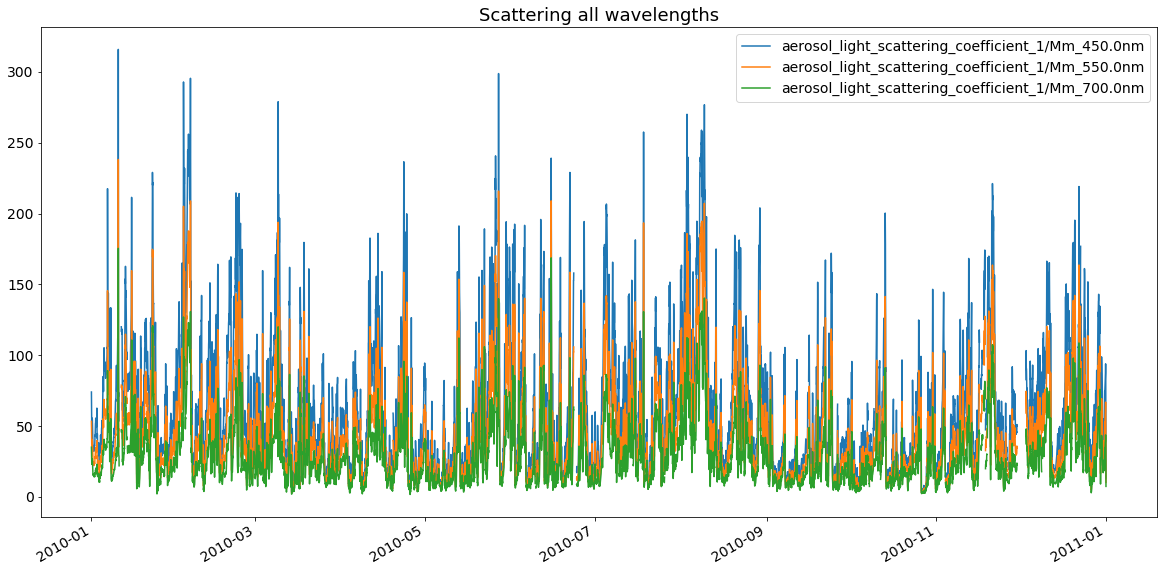

In [6]:
ax = df_scat['aerosol_light_scattering_coefficient_1/Mm_450.0nm'].plot(figsize=(20, 10))
df_scat['aerosol_light_scattering_coefficient_1/Mm_550.0nm'].plot()
df_scat['aerosol_light_scattering_coefficient_1/Mm_700.0nm'].plot()
ax.legend()
ax.set_title('Scattering all wavelengths')

#### Relative humidity (left axis)

Text(0.5, 1.0, 'Relative humidity')

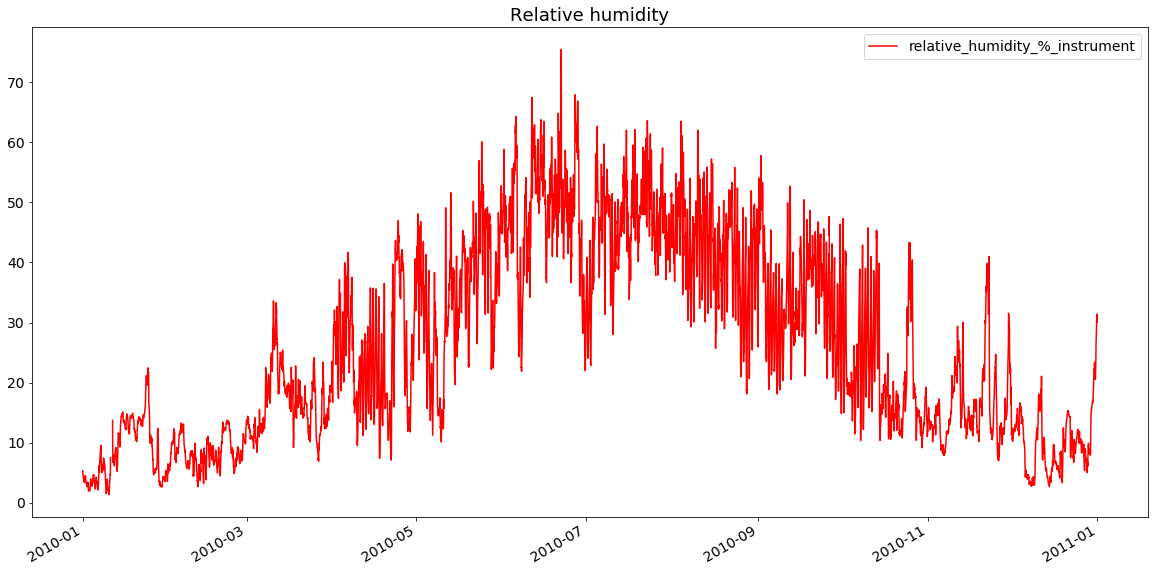

In [7]:
rh_df = data.to_dataframe(var_name='relative_humidity')

ax = rh_df.plot(style='r-', figsize=(20, 10))
ax.set_title('Relative humidity')

#### Plot scattering only at valid flags and where RH<50%

Text(0.5, 1.0, 'Scattering 550 nm (Valid flags vs. RH<50%)')

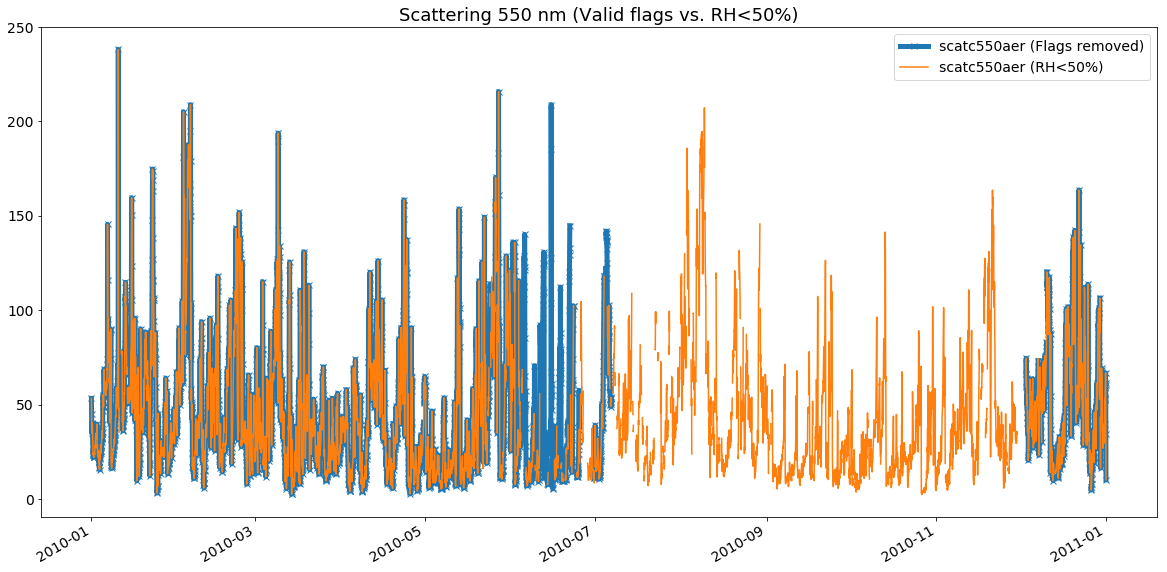

In [8]:
import numpy as np
import pandas as pd
from copy import deepcopy
# mask specifying invalid measurements
invalid = ~data.flag_col_info[25].valid

# the original scattering data
scatc550aer = df_scat['aerosol_light_scattering_coefficient_1/Mm_550.0nm']

# Data where invalid flags are removed
scatc550aer_V = deepcopy(scatc550aer)
scatc550aer_V[invalid] = np.nan

scatc550dryaer = deepcopy(scatc550aer)
rhmask = rh_df['relative_humidity_%_instrument'] > 50
scatc550dryaer[rhmask] = np.nan

ax = scatc550aer_V.plot(figsize=(20, 10), label='scatc550aer (Flags removed)', style='-x', lw=5)
scatc550dryaer.plot(style='-', label='scatc550aer (RH<50%)')
ax.legend()
ax.set_title('Scattering 550 nm (Valid flags vs. RH<50%)')

This was only the lowest level of the reading routine. Test if it works using also the AEROCOM reading routine (that automatically identifies the best data column, etc. More below.

### Test reading into AEROCOM standards

In [9]:
reader = pya.io.ReadEbas()
print(reader.opts)


   PREFER_STATISTICS (list, 2 items)
   ['arithmetic mean'
    'median']

   IGNORE_STATISTICS (list, 2 items)
   ['percentile:15.87'
    'percentile:84.13']

   WAVELENGTH_TOL_NM: 50
   REMOVE_INVALID_FLAGS: False
   LOG_READ_STATS: False
   MERGE_META: False


In [10]:
try:
    data_all = reader.read_file(filename=filename, vars_to_retrieve='scatc550aer')
except Exception as e:
    from traceback import format_exc
    print(format_exc())

Traceback (most recent call last):
  File "<ipython-input-10-4494de8b0b97>", line 2, in <module>
    data_all = reader.read_file(filename=filename, vars_to_retrieve='scatc550aer')
NameError: name 'filename' is not defined



This did not work...

### ISSUE: the file does not have station_name attribute defined in metadata (this is always available in the files we get from NILU). If we do not want to handle many exceptions in pyaerocom, I would suggest that this is being corrected. 

### Compare file from Betsy with example file from our EBAS database


#### Read and print file from EBAS database (same station)

The file is defined in the beginning of the notebook.

In [11]:
data_ebas = pya.io.EbasNasaAmesFile(file_from_ebas)
print(data_ebas)

Pyaerocom EbasNasaAmesFile
--------------------------

   num_head_lines: 86
   num_head_fmt: 1001
   data_originator: Ogren, John
   sponsor_organisation: US06L, National Oceanic and Atmospheric Administration, NOAA/ESRL/GMD, "Earth System Research Laboratory, Global Monitoring Division", 325 Broadway, , CO 80305-3, Boulder, U.S.A.
   submitter: Ogren, John
   project_association: GAW-WDCA NOAA-ESRL
   vol_num: 1
   vol_totnum: 1
   ref_date: 2015-01-01T00:00:00
   revision_date: 2016-01-17T00:00:00
   freq: 0.0
   descr_time_unit: days from file reference point
   num_cols_dependent: 23
   mul_factors (list, 23 items)
   [1.0
    1.0
    ...
    1.0
    1.0]

   vals_invalid (list, 23 items)
   [999.999999
    9999.99
    ...
    999.99
    9.999999]

   descr_first_col: end_time of measurement, days from the file reference point

   Column variable definitions
   -------------------------------
   EbasColDef: name=starttime, unit=days, is_var=False, is_flag=False, flag_col=23, 
   E

#### Compare metadata names in both files

In [12]:
meta_in_both = []
meta_only_betsy = []
meta_only_ebas = []

for metakey in data_ebas.head_fix:
    if metakey in data.head_fix:
        meta_in_both.append(metakey)
    elif not metakey in data.head_fix:
        meta_only_ebas.append(metakey)
for key in data.head_fix:
    if not key in data_ebas.head_fix:
        meta_only_betsy.append(key)
        
for metakey in data_ebas.meta:
    if metakey in data.meta:
        meta_in_both.append(metakey)
    elif not metakey in data.meta:
        meta_only_ebas.append(metakey)
for key in data.meta:
    if not key in data_ebas.meta:
        meta_only_betsy.append(key)
        
print('Available in both files:\n{}'.format(meta_in_both))
print()
print('Only in file from Betsy:\n{}'.format(meta_only_betsy))
print()
print('Only in file from EBAS:\n{}'.format(meta_only_ebas))

Available in both files:
['num_head_lines', 'num_head_fmt', 'data_originator', 'sponsor_organisation', 'submitter', 'project_association', 'vol_num', 'vol_totnum', 'ref_date', 'revision_date', 'freq', 'descr_time_unit', 'num_cols_dependent', 'mul_factors', 'vals_invalid', 'descr_first_col', 'data_definition', 'set_type_code', 'timezone', 'file_name', 'startdate', 'revision_date', 'version', 'data_level', 'period_code', 'resolution_code', 'sample_duration', 'station_code', 'platform_code', 'measurement_latitude', 'measurement_longitude', 'measurement_altitude', 'measurement_height', 'component', 'unit', 'matrix', 'laboratory_code', 'instrument_type', 'instrument_name', 'instrument_manufacturer', 'instrument_model', 'instrument_serial_number', 'method_ref', 'standard_method', 'inlet_type', 'inlet_description', 'humidity/temperature_control', 'volume_std._temperature', 'volume_std._pressure', 'detection_limit', 'detection_limit_expl.', 'zero/negative_values_code', 'zero/negative_values', 

### Conclusion

The way the files are currently designed, we cannot read them with the high-level pyaerocom reading routine. For that, at least the following meta parameters should be in the file:

- 'station_name'
- 'station_latitude'
- 'station_longitude'
- 'station_altitude'